In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path= r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 6'

In [3]:
crimes=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'crimes_derived.csv'), index_col=False)

In [95]:
#since my dataset has a lot of columns, I am going to create a subset containing fewer numeric columns
#these columns are the ones that had the strongest correlation to the danger score
df= crimes[['danger_score', 'Non Family Household', 'Vacant Housing Units', 'Age 20 to 29', 'Household Income Less 10000']]

# The elbow technique

In [96]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [97]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\clust

[-2966777485201.3247,
 -1100530384289.4734,
 -649046707148.3473,
 -382427004405.9496,
 -242182268637.9666,
 -180615981147.33893,
 -151451601795.84412,
 -112790389875.64403,
 -86670829706.6501]

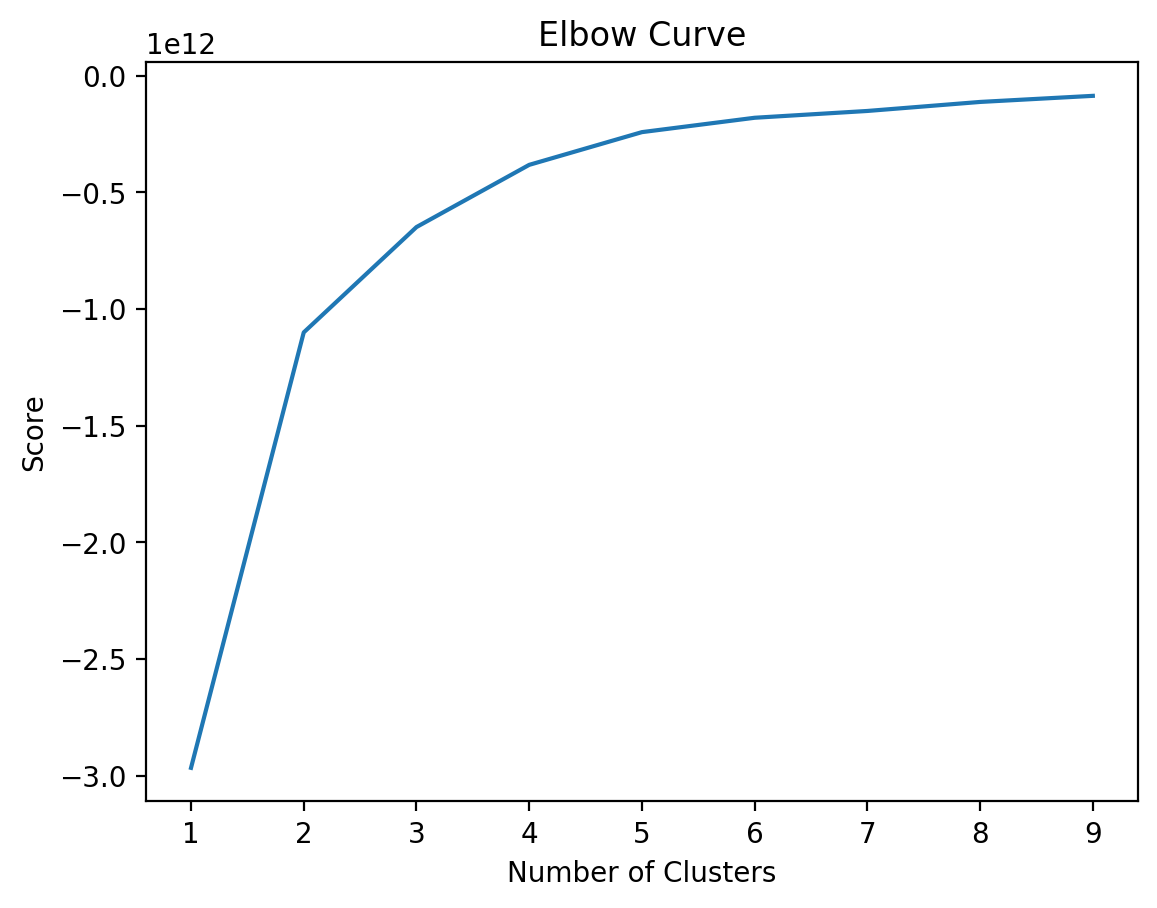

In [98]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
#there are jumps going up to 5, then the curve starts to flatten out. So, I will use 5 clusters.

# k-Means clustering

In [99]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [100]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [101]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\AppData\Local\Temp\ipykernel_7816\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [102]:
df['clusters'].value_counts()

clusters
3    136587
0    109105
4     67868
1     36224
2     20707
Name: count, dtype: int64

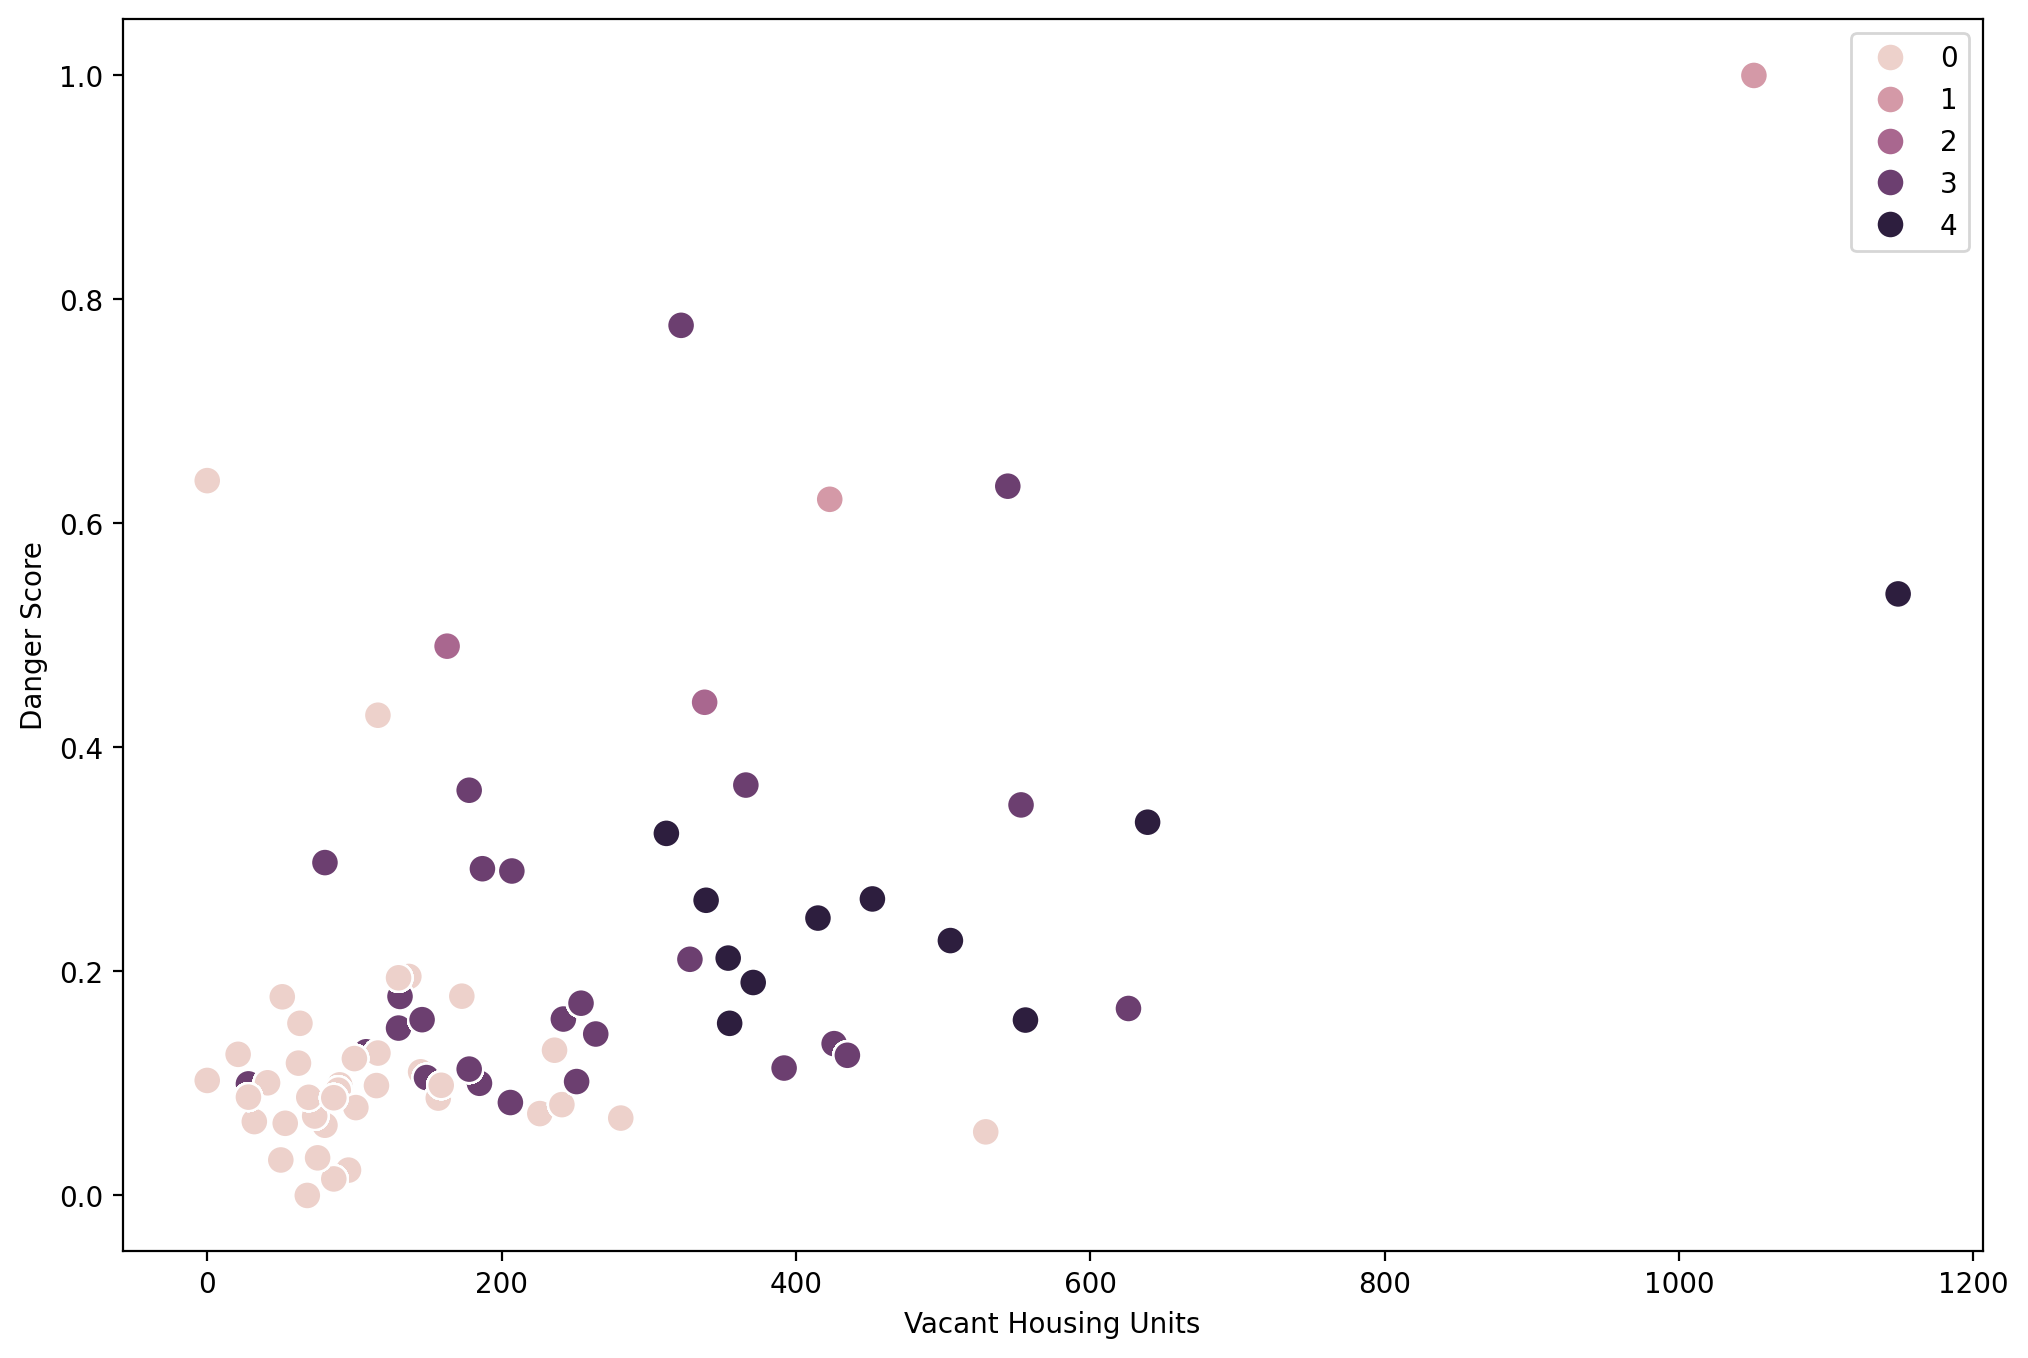

In [103]:
# Plot the clusters for the "danger_score" and "vacant housing units" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Vacant Housing Units'], y=df['danger_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Vacant Housing Units') # Label x-axis.
plt.ylabel('Danger Score') # Label y-axis.
plt.show()

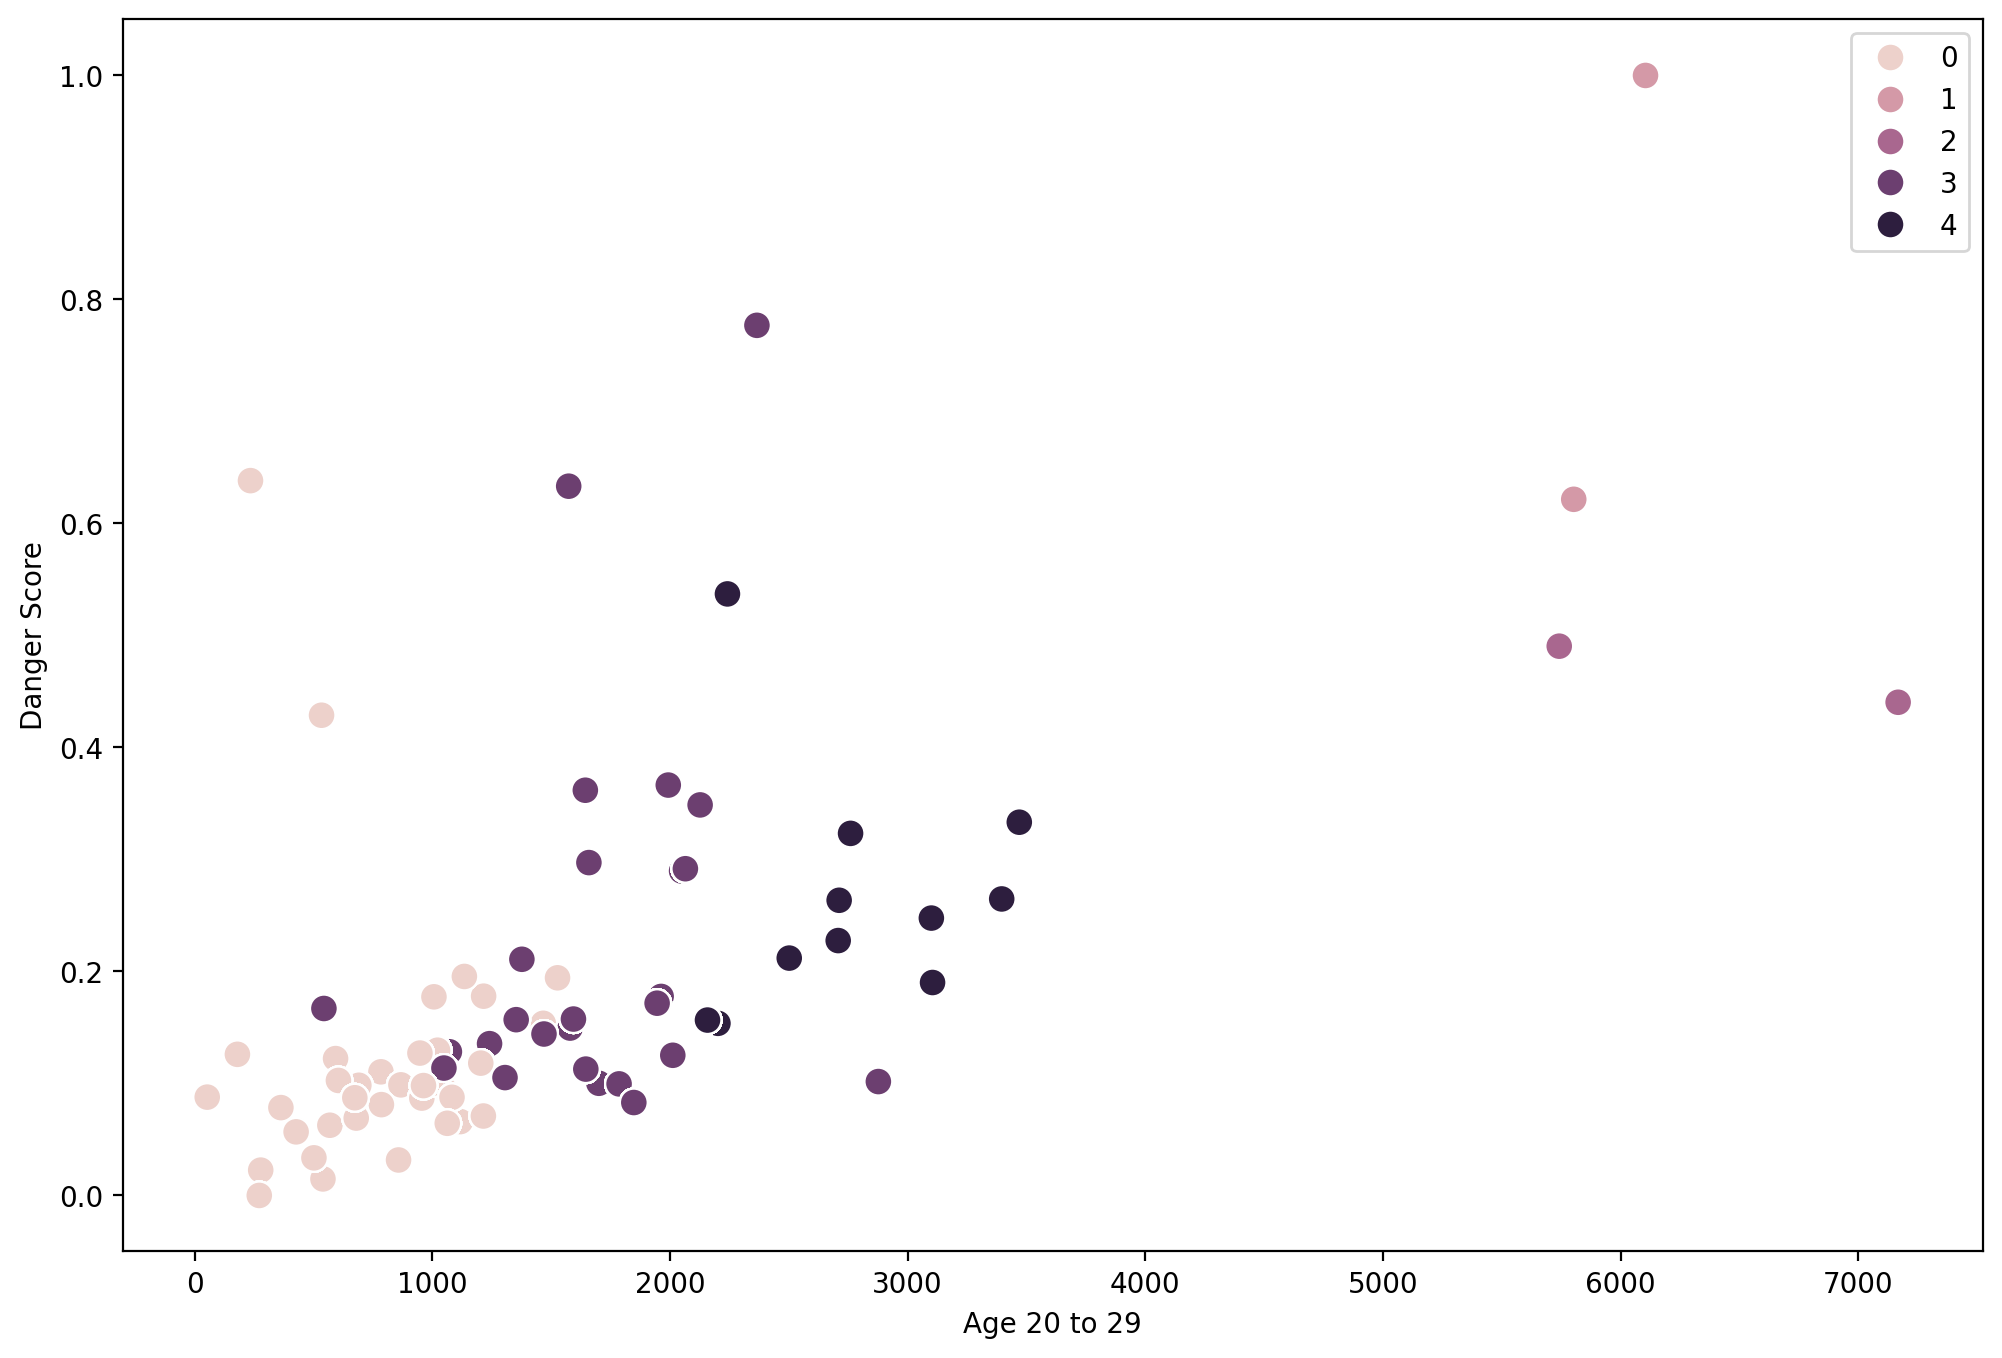

In [104]:
# Plot the clusters for the "danger_score" and "Age 20 to 29" variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df['Age 20 to 29'], y=df['danger_score'], hue=kmeans.labels_, s=100) 

ax1.grid(False) 
plt.xlabel('Age 20 to 29')
plt.ylabel('Danger Score')
plt.show()

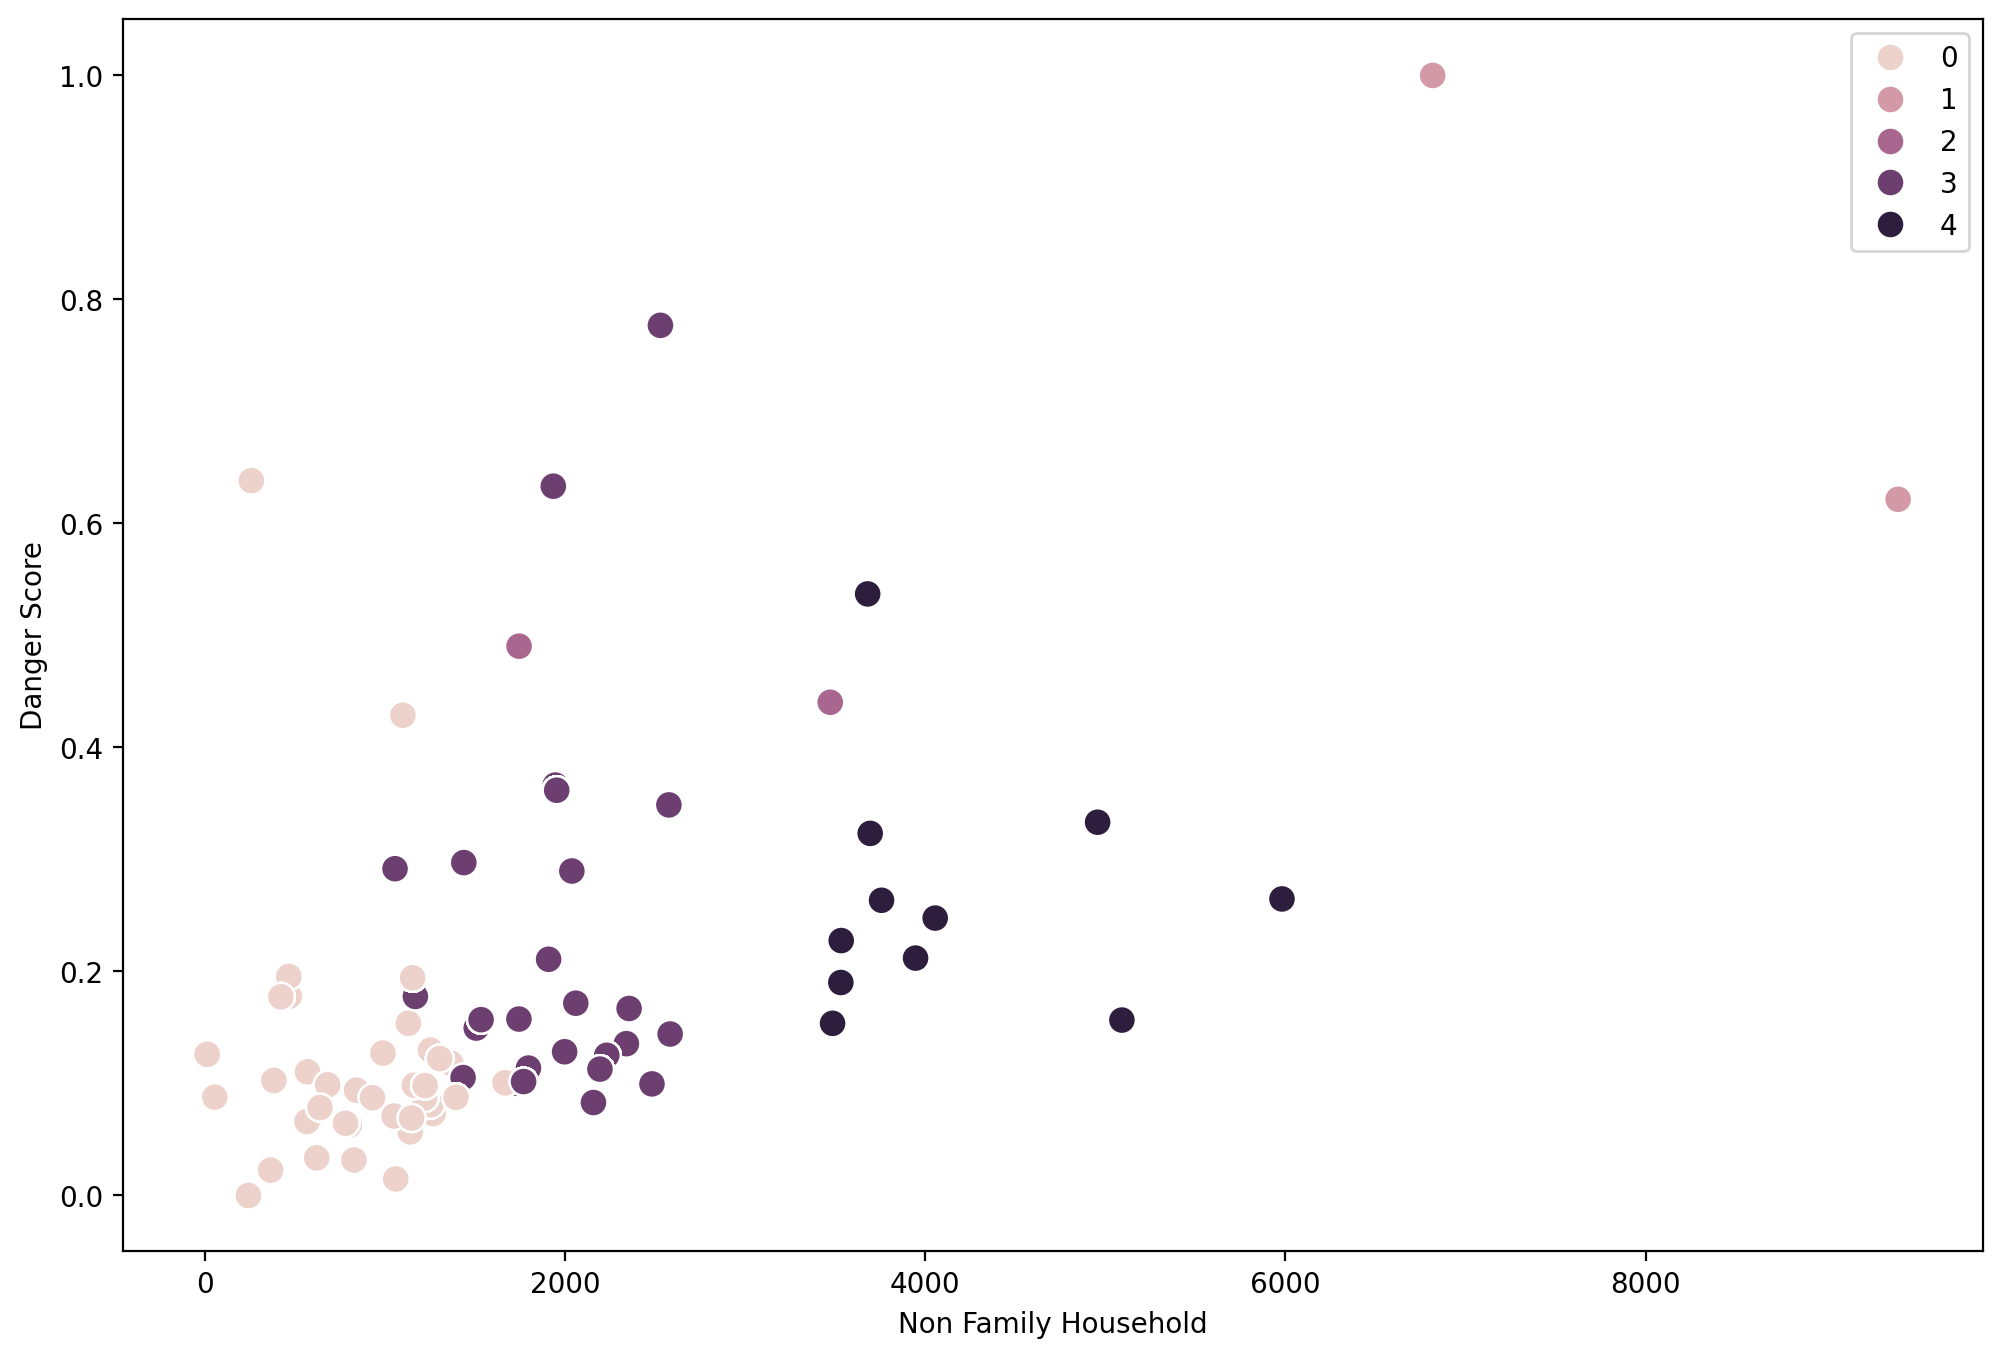

In [105]:
# Plot the clusters for the "danger_score" and "Non Family Household" variables.

plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=df['Non Family Household'], y=df['danger_score'], hue=kmeans.labels_, s=100) 

ax2.grid(False) 
plt.xlabel('Non Family Household')
plt.ylabel('Danger Score')
plt.show()

# Trying Principal Components Analysis (with the help of ChatGPT)

In [106]:
#making a new df with more columns that could potentially explain more variance.
df1= crimes[['danger_score', 'Non Family Household', 'Vacant Housing Units', 'Age 20 to 29', 'Household Income Less 10000', 'victim_count', 'Total Population All', 'MALE', 'FEMALE', 'Age 10 to 19', 'Age 30 to 39', 'Not Enrolled', 'Total Commuters', 'Less Than HS Diploma', 'Total Housing Units', 'Median Household Income', 'Per Capita Income', 'Foreign Born FB', 'Percent Living in Poverty', 'Median Home Value', 'Married Couple Family','Commute Over 60 Minutes', 'Spanish', 'Grades 9 to 12', 'Median Age All']]

In [107]:
# Select only the numerical columns
df_numerical = df1.select_dtypes(include=['number']).copy()

In [108]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)

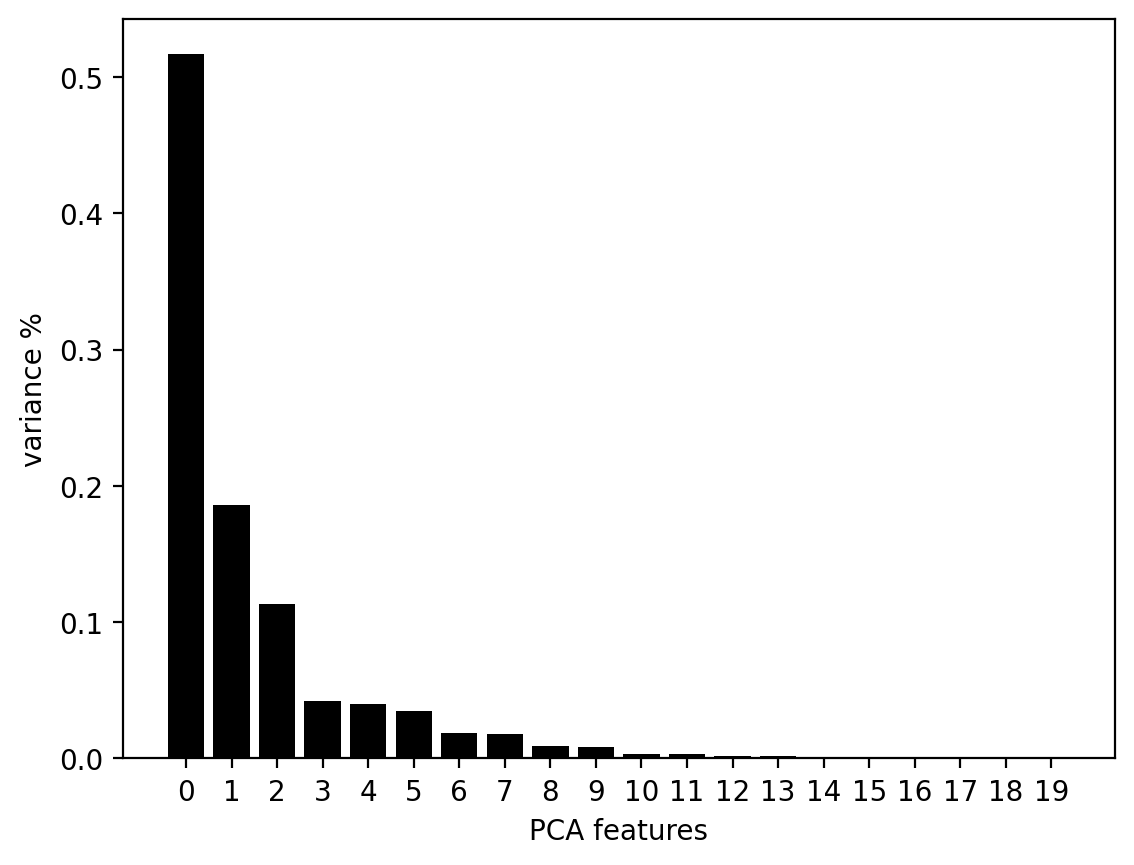

In [109]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df_imputed)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
#as you can see, there is a large dropoff in variance explained after the first component.

In [110]:
pca = PCA(n_components=2)  # Adjust as needed
pca.fit(df_imputed)

# Extract the loadings for the first principal component (PC1)
loadings = pd.Series(pca.components_[0], index=df_imputed.columns)

# Sort the loadings by absolute value
sorted_loadings = loadings.abs().sort_values(ascending=False)

# Display the sorted loadings
print(sorted_loadings)


Median Home Value              9.825822e-01
Median Household Income        1.353123e-01
Per Capita Income              1.256138e-01
Total Population All           1.107846e-02
Spanish                        1.096725e-02
Foreign Born FB                6.527401e-03
Not Enrolled                   6.495139e-03
FEMALE                         5.802953e-03
MALE                           5.275512e-03
Total Commuters                4.461325e-03
Less Than HS Diploma           4.305114e-03
Age 10 to 19                   2.842929e-03
Age 20 to 29                   1.768488e-03
Grades 9 to 12                 1.205328e-03
Non Family Household           1.114704e-03
Age 30 to 39                   9.531895e-04
Commute Over 60 Minutes        7.694526e-04
Vacant Housing Units           7.376693e-04
Married Couple Family          4.224114e-04
Household Income Less 10000    1.372405e-04
Total Housing Units            3.214671e-05
Percent Living in Poverty      1.632066e-05
Median Age All                 1

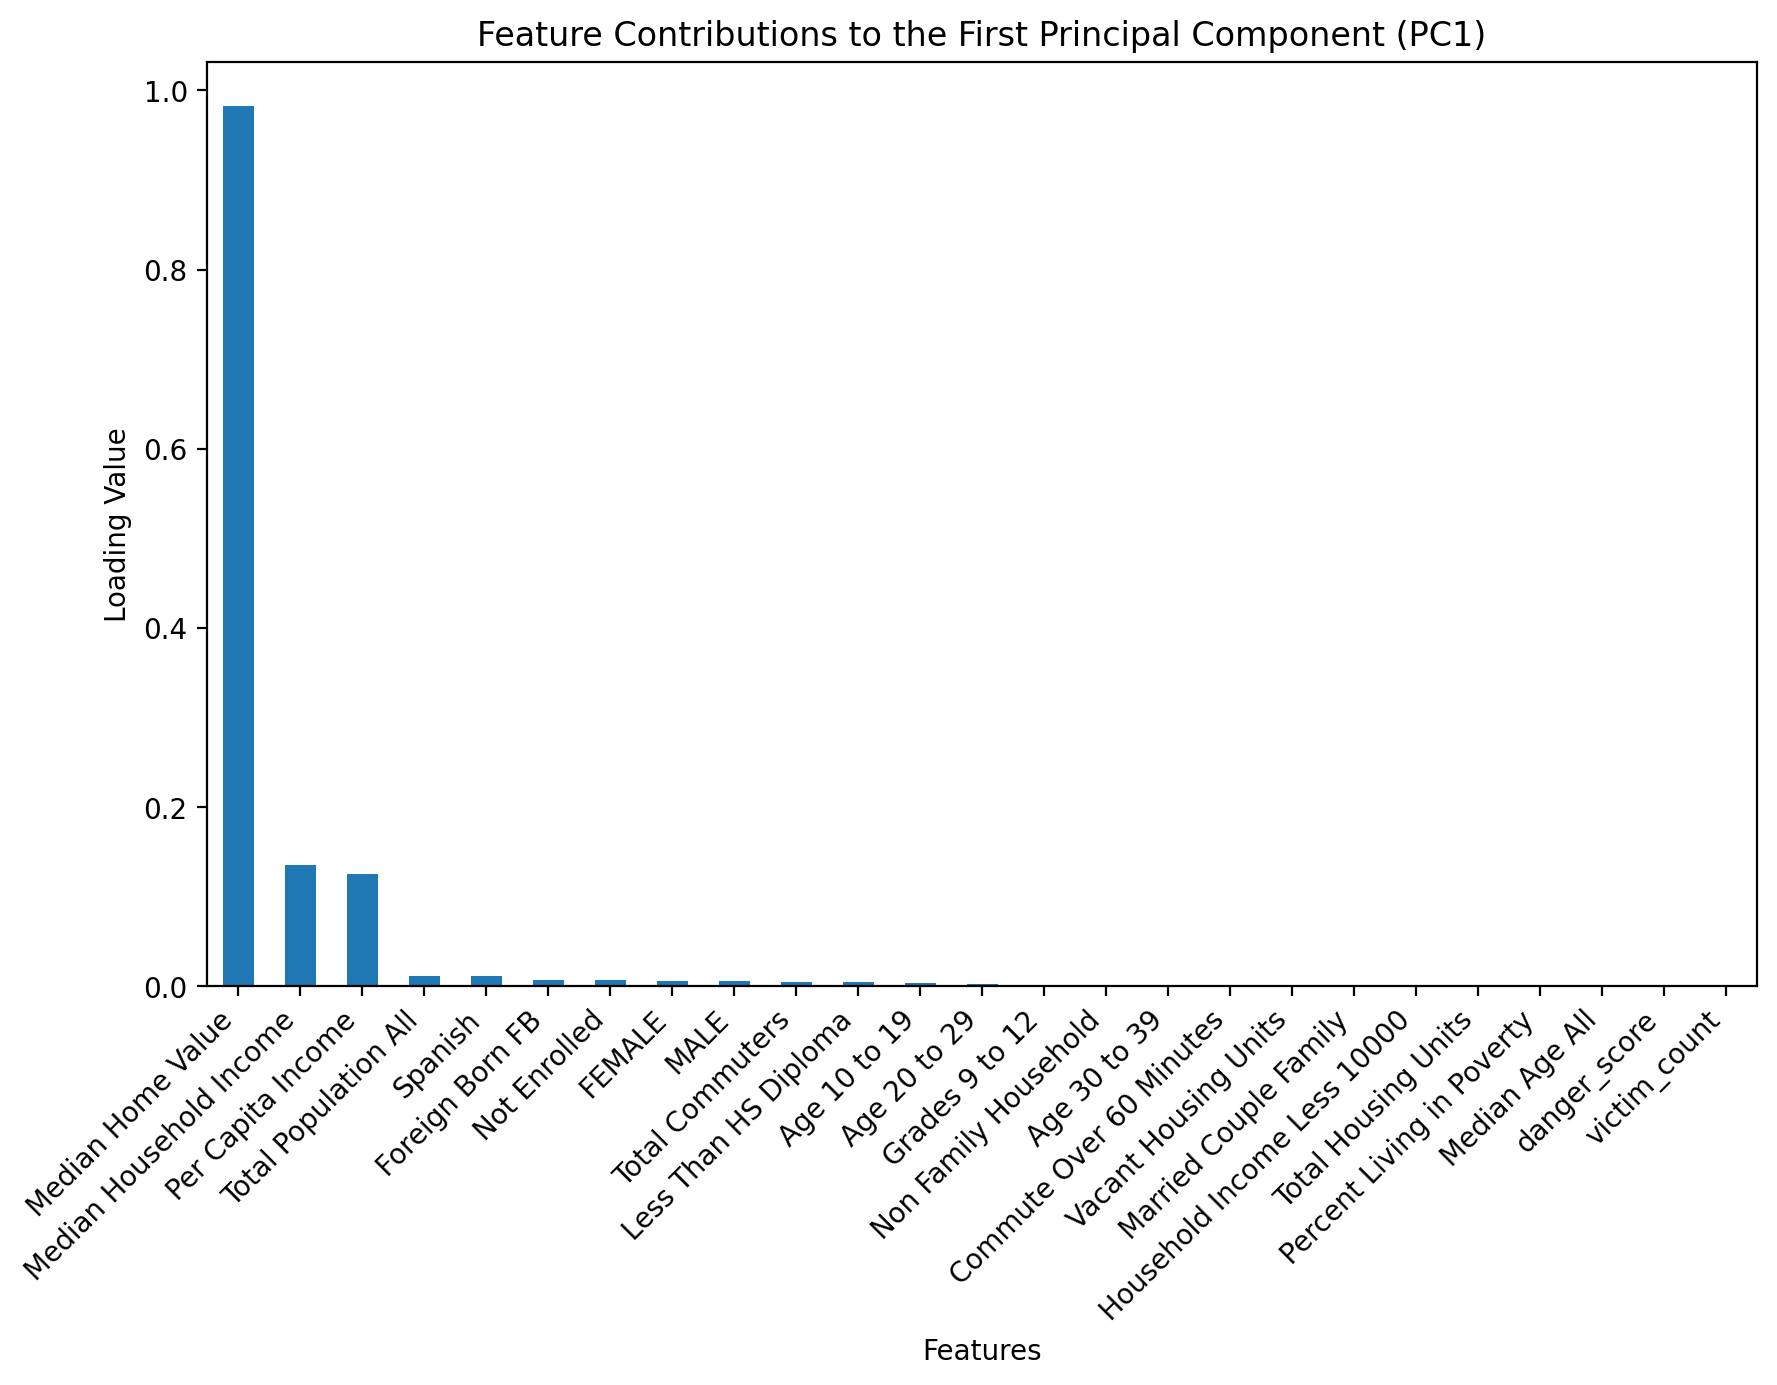

In [111]:
# Plot the loadings
plt.figure(figsize=(10, 6))
sorted_loadings.plot(kind='bar')
plt.title('Feature Contributions to the First Principal Component (PC1)')
plt.ylabel('Loading Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()


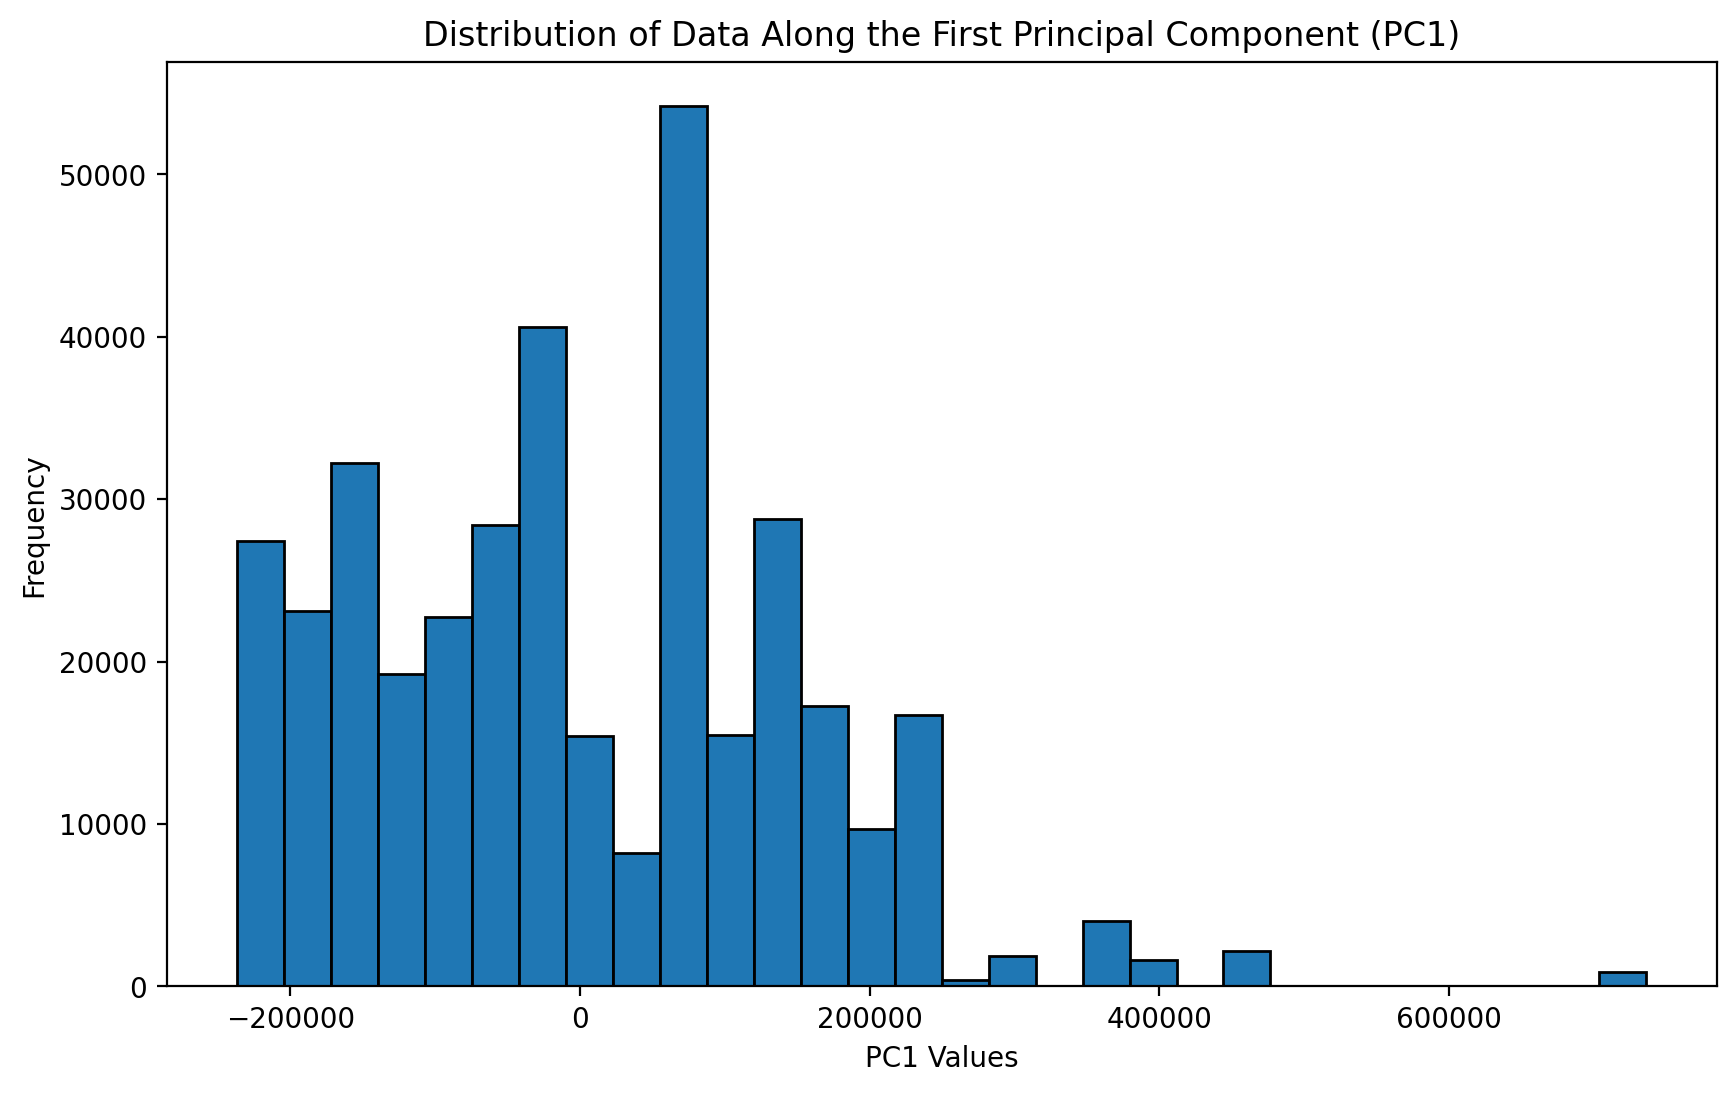

In [112]:
# Project the original data onto the first principal component
pca_transformed = pca.transform(df_imputed)

# Create a DataFrame for PC1
df_pc1 = pd.DataFrame(pca_transformed[:, 0], columns=['PC1'])

# Plot the distribution of the data along PC1
plt.figure(figsize=(10, 6))
plt.hist(df_pc1['PC1'], bins=30, edgecolor='black')
plt.title('Distribution of Data Along the First Principal Component (PC1)')
plt.xlabel('PC1 Values')
plt.ylabel('Frequency')
plt.show()


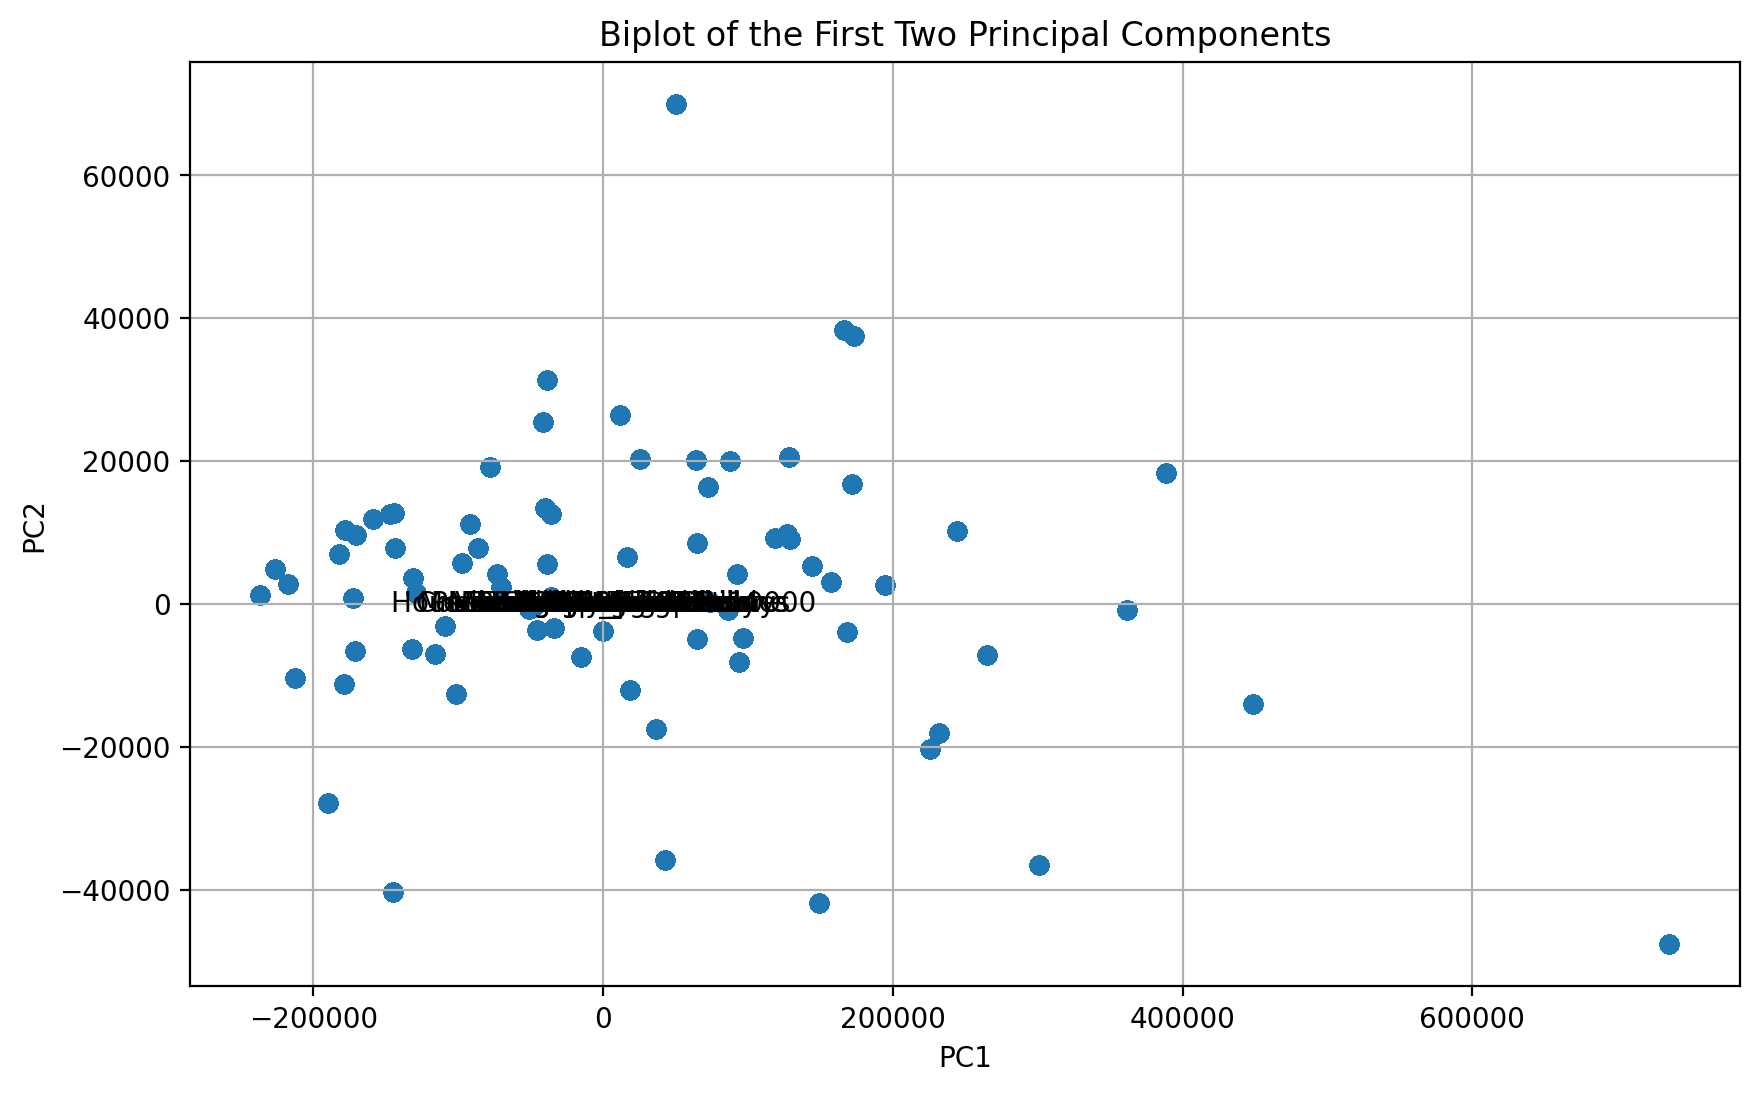

In [113]:
plt.figure(figsize=(10, 6))

# Scatter plot of the data in the space of the first two components
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)

# Plot the loadings (arrows) for the first two principal components
for i, feature in enumerate(df_imputed.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.75)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             feature, color='black', ha='center', va='center')

plt.title('Biplot of the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [ ]:
#too many features crowding the graph. let's pare that down to the top 2 features.

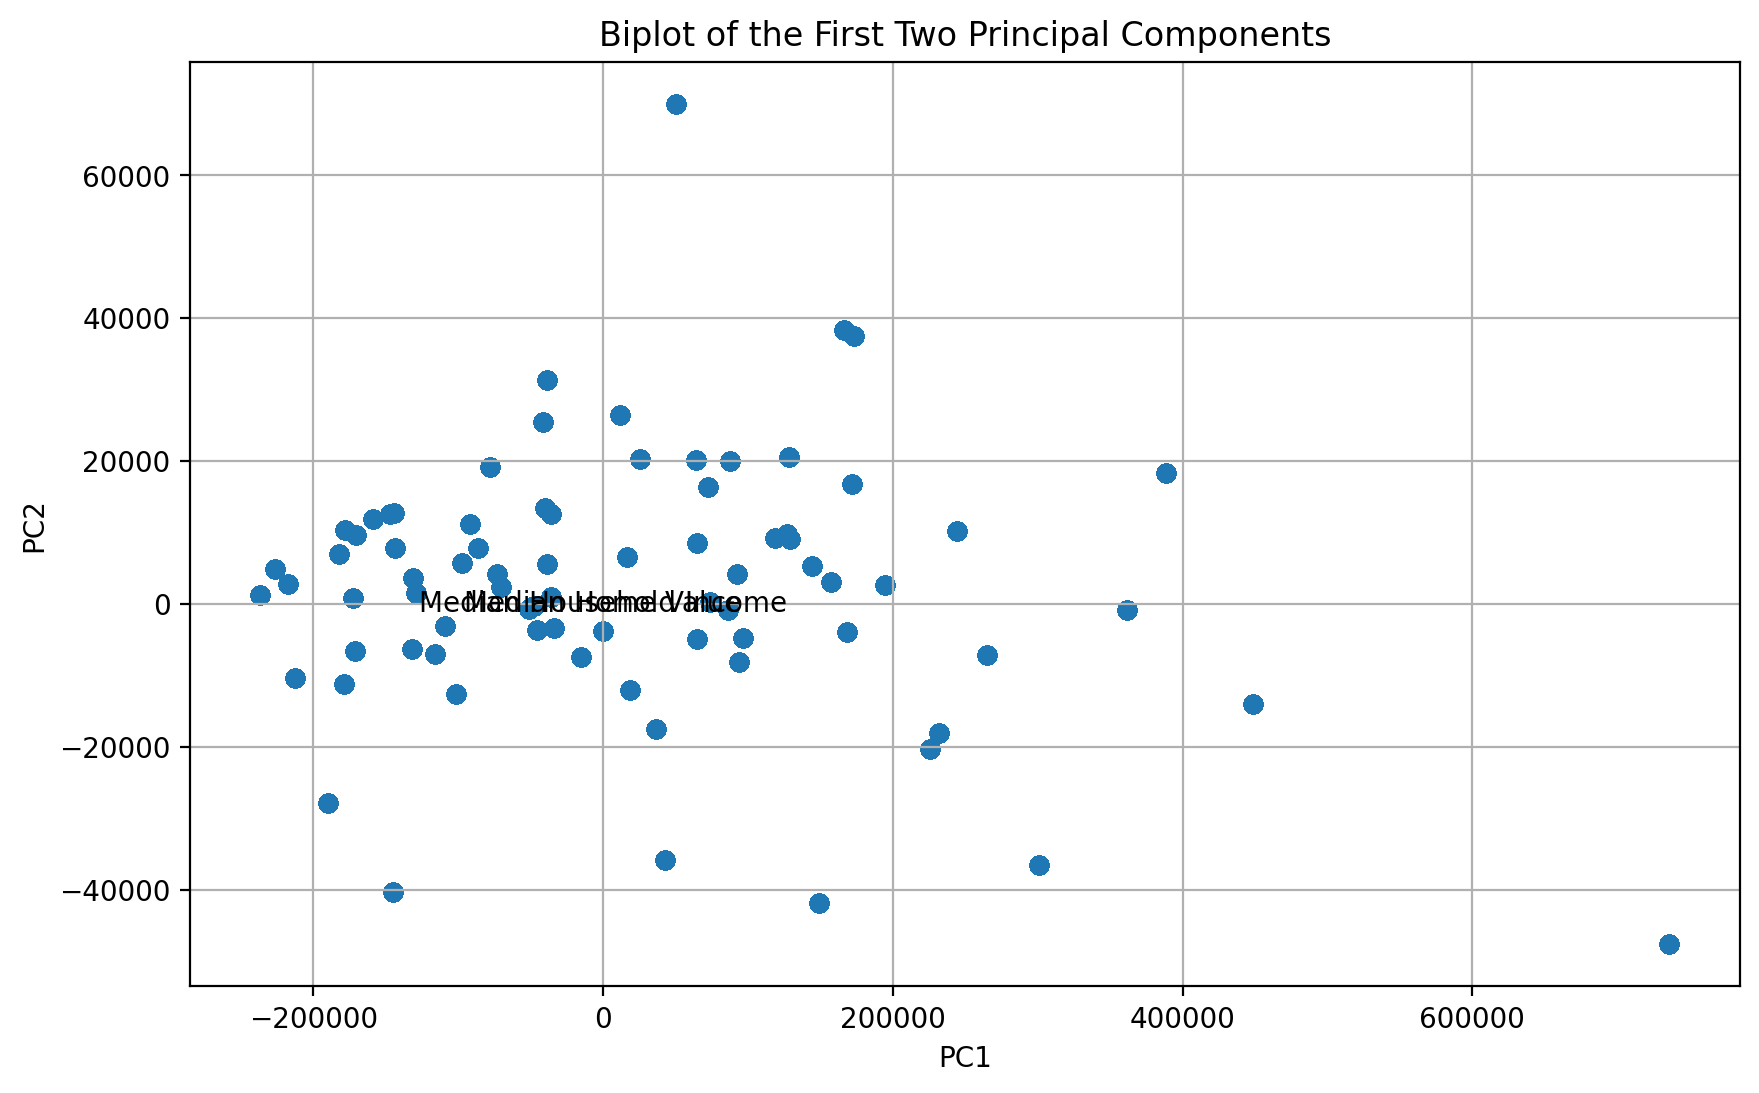

In [114]:
#median household value and median household income
top_features = sorted_loadings.head(2).index  # Select top 2 features based on loadings

plt.figure(figsize=(10, 6))

# Scatter plot of the data in the space of the first two components
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)

# Plot the loadings (arrows) for the top features
for feature in top_features:
    i = df_imputed.columns.get_loc(feature)
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.75)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             feature, color='black', ha='center', va='center')

plt.title('Biplot of the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

pca = PCA(n_components=2)
pca.fit(df_scaled)

pca_transformed = pca.transform(df_scaled)


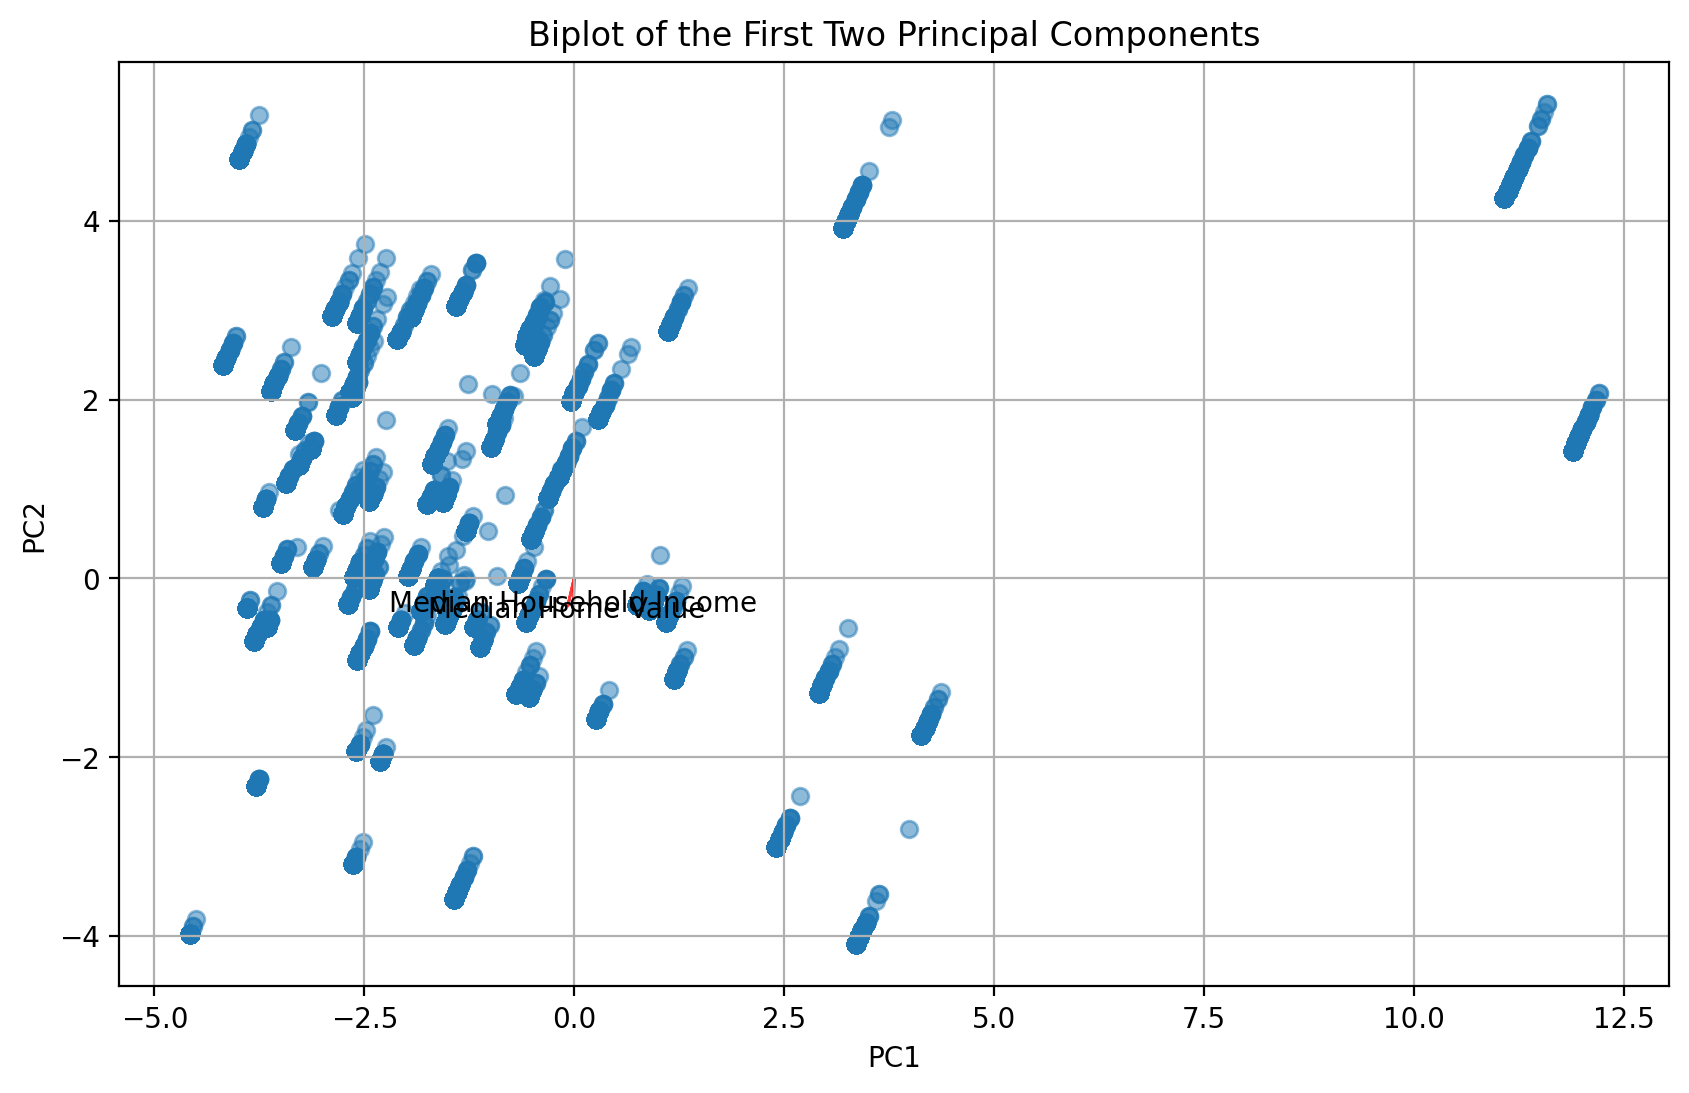

In [116]:
top_features = sorted_loadings.head(2).index  # Select top  features based on loadings

plt.figure(figsize=(10, 6))

# Scatter plot of the data in the space of the first two components
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)

# Plot the loadings (arrows) for the top features
for feature in top_features:
    i = df_imputed.columns.get_loc(feature)
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='red', alpha=0.75)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15,
             feature, color='black', ha='center', va='center')

plt.title('Biplot of the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [ ]:
#now that I have discerned that median home value and median household income explain a lot of the variance, I will attempt k-means again.

# Back to k-means

In [117]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [118]:
score = [kmeans[i].fit(df_imputed).score(df_imputed) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\clust

[-8620952747401524.0,
 -2786018725745263.0,
 -1756656736932533.5,
 -1090134738575909.8,
 -750055597389669.8,
 -630030881471247.6,
 -508873160382556.2,
 -419611464260261.6,
 -355910063128493.25]

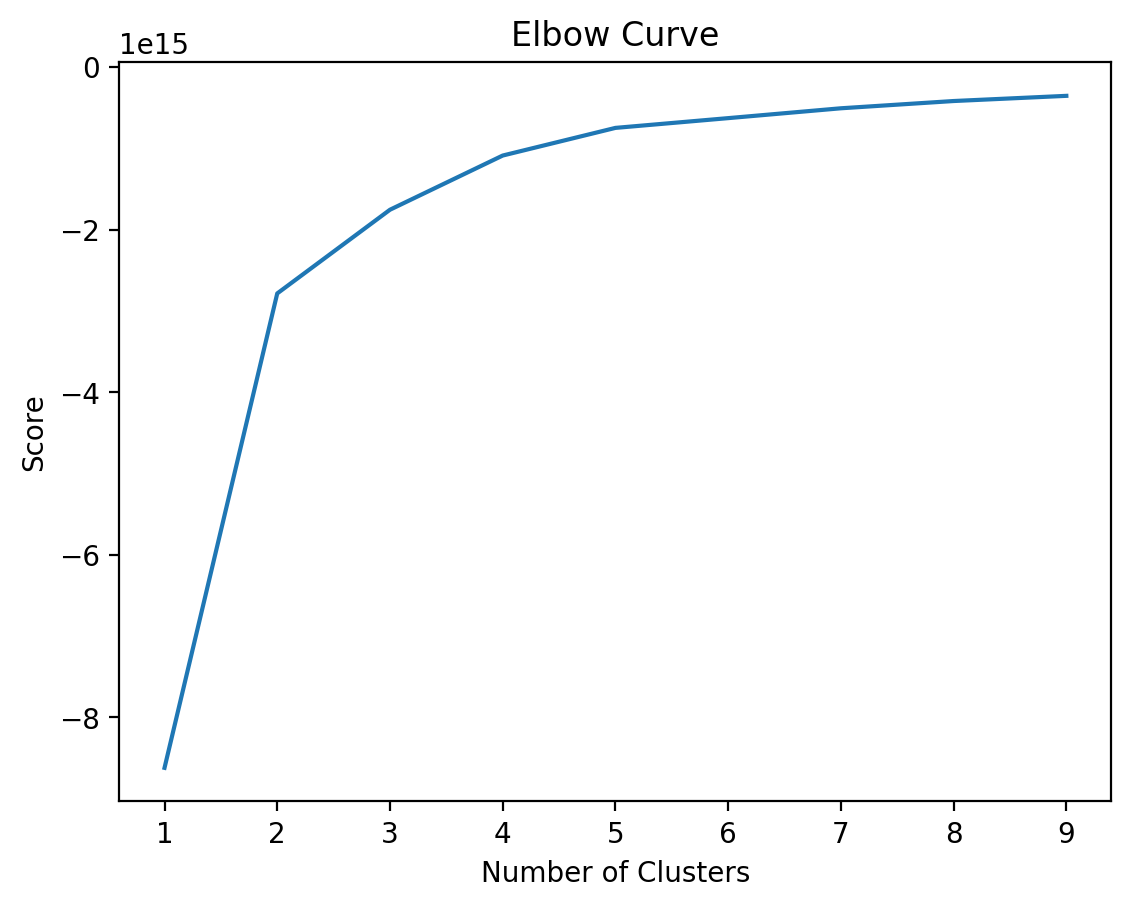

In [119]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [120]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [121]:
df_imputed['clusters'] = kmeans.fit_predict(df_imputed)

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
df_imputed['clusters'].value_counts()

clusters
4    100089
1     99469
0     87514
2     72827
3     10592
Name: count, dtype: int64

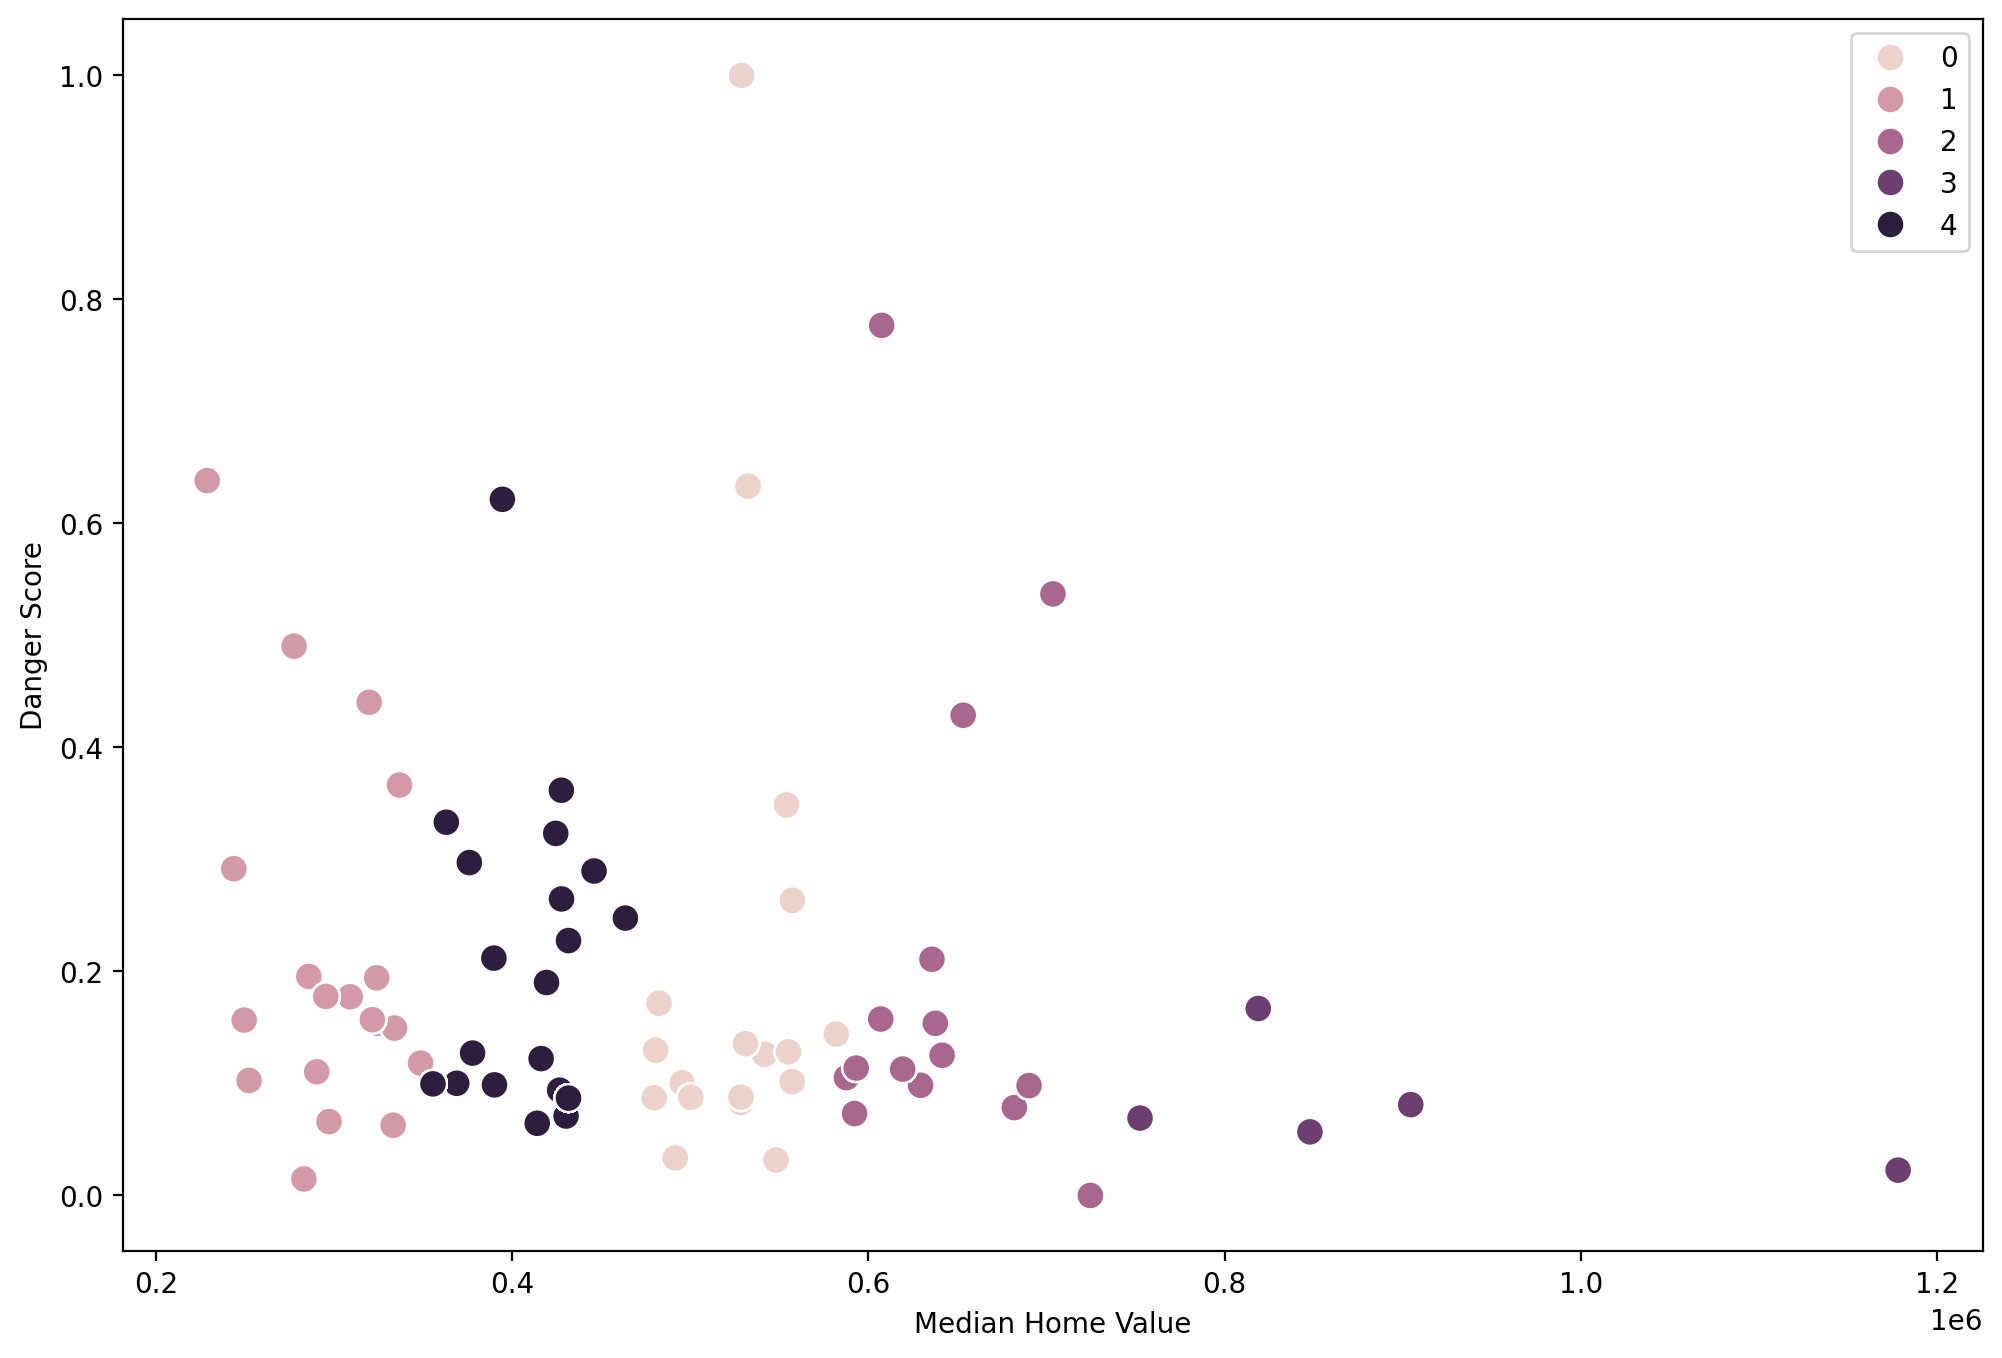

In [126]:
# Plot the clusters for the "danger_score" and "Median home value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_imputed['Median Home Value'], y=df_imputed['danger_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Home Value') # Label x-axis.
plt.ylabel('Danger Score') # Label y-axis.
plt.show()

In [ ]:
#okay as we can see, the first four groups all have danger scores that go beyond 0.6, despite the increase in median home value
#the far right cluster, however, does not; this tells me that areas with very wealthy homes are probably more guarded or secure, due to the high property values (and higher social class)
#curiously, the cheapest homes seem to have danger scores on par with successively more expensive homes, besides the aforementioned cluster
#this tells me that areas with cheap homes compared to areas with moderately wealthy homes have similar means of security/crime prevention/etc.

In [127]:
ax.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'median_home_danger_cluster_plot.png'))

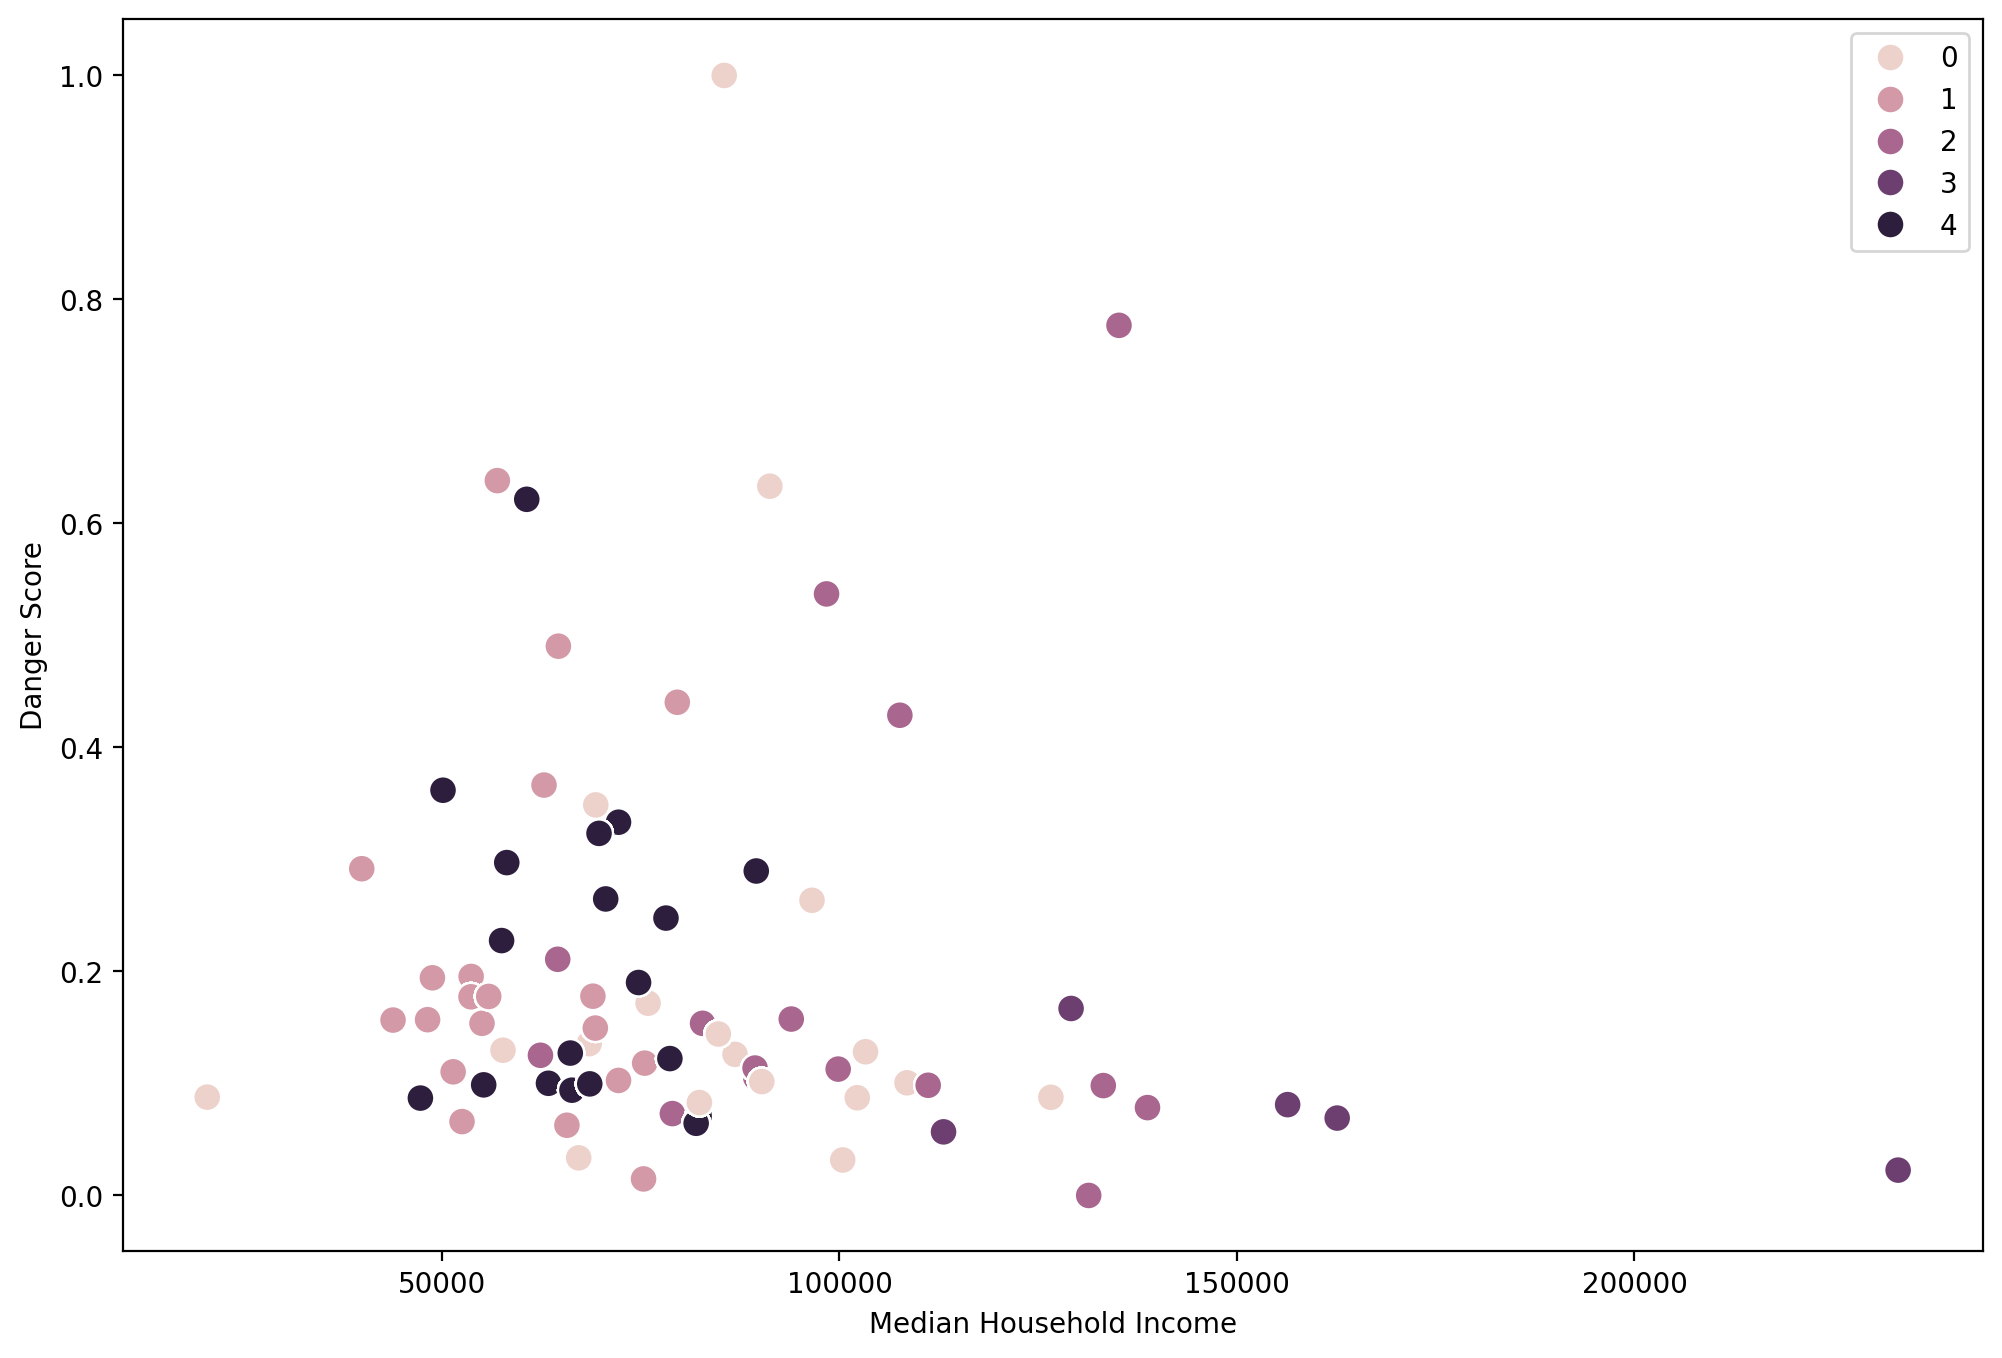

In [128]:
# Plot the clusters for the "danger_score" and "Median household income" variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df_imputed['Median Household Income'], y=df_imputed['danger_score'], hue=kmeans.labels_, s=100) 

ax1.grid(False) 
plt.xlabel('Median Household Income')
plt.ylabel('Danger Score') 
plt.show()

In [ ]:
#difficult to discern any worthwhile patterns in these clusters.

In [129]:
df.loc[df_imputed['clusters'] == 4, 'cluster'] = 'very dark purple'
df.loc[df_imputed['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df_imputed['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df_imputed['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df_imputed['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\jphil\AppData\Local\Temp\ipykernel_7816\1869599346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df_imputed['clusters'] == 4, 'cluster'] = 'very dark purple'


In [131]:
#calculating descriptive statistics
df_imputed.groupby('clusters').agg({'Median Home Value':['mean', 'median'], 
                         'Median Household Income':['mean', 'median'], 
                         'Per Capita Income':['mean', 'median'],
                          'danger_score':['mean', 'median']})

Median Home Value           Median Household Income            \
                      mean    median                    mean    median   
clusters                                                                 
0            530975.979352  530933.0            84794.130482   85513.0   
1            290215.132715  294600.0            59747.007007   56981.0   
2            639550.468535  635650.0           105358.083252   99847.0   
3            858459.884819  818900.0           146746.470733  129139.0   
4            409146.041903  419225.0            66914.582881   66364.0   

         Per Capita Income          danger_score            
                      mean   median         mean    median  
clusters                                                    
0             56614.210321  55240.0     0.456175  0.348689  
1             25709.665303  28064.0     0.315378  0.291713  
2             69584.335700  63214.0     0.392107  0.428764  
3            101818.932591  98101.0     0.103246  0.081084  
4             45676.643767  42952.0     0.290409  0.289685

In [ ]:
#these findings tell us we're still not that close to discovering what exactly leads to higher neighborhood danger scores
#the cheapest cluster by way of home value is cluster 1; however, it has the third-lowest danger score
#cluster 1 alos has the lowest per capita income, yet the third-lowest danger score
#obviously, wealth and income status are not direct proxies for how much someone encounters crime in their neighborhood.

In [ ]:
#more analyses to be done; it will be interesting to see how time affects- or doesn't affect- crime rates in given areas. 
#perhaps I can find another way to analyze the variables I have at my disposal to build a more complete Denver Crime picture.